# Explanatory Data Analysis in Python
(Tevfik Aytekin)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
%matplotlib inline
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100

In [19]:
# create a DataFrame 
df = pd.DataFrame([[100, 1990, 100000],
                  [120, 2002, 150000],
                  [90, 2012, 120000]],
                 index = [5, 10,15],
                 columns = ["area","built","price"])

In [20]:
df

,area,built,price
5,100,1990,100000
10,120,2002,150000
15,90,2012,120000


In [21]:
# loc: label-based indexing
# iloc: position-based indexing 

In [22]:
# select a single value in a DataFrame using loc
df.loc[5,"area"]

100

In [23]:
# select a single value in a DataFrame using iloc
df.iloc[0,0]

100

In [24]:
# select column(s) in a DataFrame - I
df.loc[:,"area"]

5     100
10    120
15     90
Name: area, dtype: int64

In [25]:
# iloc version
df.iloc[:,0]

5     100
10    120
15     90
Name: area, dtype: int64

In [26]:
# select column(s) in a DataFrame - II
df["area"]

5     100
10    120
15     90
Name: area, dtype: int64

In [27]:
# select column(s) in a DataFrame - III
df.area

5     100
10    120
15     90
Name: area, dtype: int64

In [28]:
df.loc[5:10,"area"]

5     100
10    120
Name: area, dtype: int64

In [29]:
# print a row of a DataFrame using loc
df.loc[10]

area        120
built      2002
price    150000
Name: 10, dtype: int64

In [30]:
# Returned object is a Series object
type(df.iloc[:,0])

pandas.core.series.Series

In [31]:
# Select a specific region
df.iloc[[1,2], [1,2]]

,built,price
10,2002,150000
15,2012,120000


In [32]:
df.iloc[[0,2], [1,2]]

,built,price
5,1990,100000
15,2012,120000


In [33]:
# load train.csv file from Kaggle "House Prices: Advanced Regression Techniques" dataset 
train = pd.read_csv("house-prices/train.csv")
# print first 5 examples
train.head(5)

FileNotFoundError: File b'house-prices/train.csv' does not exist

In [34]:
type(train)

NameError: name 'train' is not defined

In [35]:
train.loc[0]

NameError: name 'train' is not defined

In [36]:
print(train.MSZoning.unique());

NameError: name 'train' is not defined

In [37]:
# print last 5 examples
train.tail(5)

NameError: name 'train' is not defined

In [38]:
# Check the number of examples (rows) and features (columns)
train.shape

NameError: name 'train' is not defined

In [39]:
# Show basic describtive statistics of columns
train.describe()
# returned value is also a dataframe

NameError: name 'train' is not defined

In [40]:
# create a DataFrame 
df2 = pd.DataFrame([[1, 1990, 100000],
                  [2, 2002, 150000],
                  [3, 2012, 120000],
                  [4, 2012, 120000],
                  [5, 2012, 120000],
                  [6, 2012, 120000],
                  [7, 2012, 120000],
                  [8, 2012, 120000]],
                 index = [5,10,15,20,25,30,35,40],
                 columns = ["area","built","price"])

In [41]:
df2

,area,built,price
5,1,1990,100000
10,2,2002,150000
15,3,2012,120000
20,4,2012,120000
25,5,2012,120000
30,6,2012,120000
35,7,2012,120000
40,8,2012,120000


In [42]:
# pth percentile: p percent of the values below it. 
df2.describe()

,area,built,price
count,8.00000,8.000000,8.000000
mean,4.50000,2008.000000,121250.000000
std,2.44949,8.071113,13562.026819
min,1.00000,1990.000000,100000.000000
25%,2.75000,2009.500000,120000.000000
50%,4.50000,2012.000000,120000.000000
75%,6.25000,2012.000000,120000.000000
max,8.00000,2012.000000,150000.000000


In [43]:
# show all column names
train.columns

NameError: name 'train' is not defined

In [44]:
# show descriptive statistics of all columns (numerical and categorical)
train.describe(include="all")

NameError: name 'train' is not defined

In [45]:
# show descriptive statistics of specific columns
train.describe(include='all').loc[:,"LotArea"]

NameError: name 'train' is not defined

In [46]:
# Column types
train.dtypes

NameError: name 'train' is not defined

In [47]:
train.isnull().sum()

NameError: name 'train' is not defined

### Working with missing data
[Working with missing data](https://pandas.pydata.org/pandas-docs/stable/missing_data.html)

In [48]:
plt.figure(figsize=(12,10));
sns.heatmap(train.corr());

NameError: name 'train' is not defined

<Figure size 864x720 with 0 Axes>

In [49]:
# get top correlations with SalePrice
cors = train.corr(); 
cors.loc[:, "SalePrice"].sort_values(ascending = False).head(10)

NameError: name 'train' is not defined

## What is correlation?
There are different notions of correlation, the most famous one is called Pearson correlation coefficient (Spearman rank correlation, for which there is an example later below, is another type of correlation)

0.5380030075946644

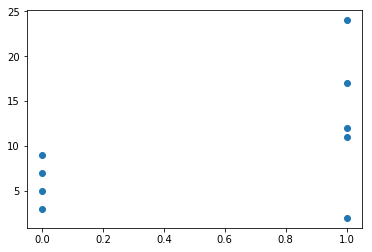

In [6]:
# Correlation is a measure of linear relationship between two random variables X and Y.
# Example
X = [2, 4, 6, 8, 12, 14, 18, 21, 23]
Y = [3, 5, 7, 9, 11, 12, 17, 22, 24]

plt.plot(X,Y, "o")
np.corrcoef(X,Y)[0,1]

Below are some example datases with various degrees of Pearson correlation.

Question: Note that there is not correlation coefficient value for the dataset in the middle position. Why is that? Hint: Check the definition of correlation.
![](images/cor1.png)
[image source](http://commons.wikimedia.org/wiki/File:Correlation_examples2.svg)

### <center>Anscombe's Quartet</center>

For all four datasets below the Pearson correlation coefficient is: +0.816.
![](images/cor2.png)
[image source](http://commons.wikimedia.org/wiki/File:Anscombe%27s_quartet_3.svg)


### Outlier Problem

In [ ]:
# Example
X = [13, 10, 6, 8, 12, 9, 18, 21, 6]
Y = [3, 5, 7, 9, 11, 12, 17, 12, 24]
plt.plot(X,Y, "o")
np.corrcoef(X,Y)[0,1]

In [ ]:
# After adding a single outlier
X = [13, 10, 6, 8, 12, 9, 18, 21, 6, 100]
Y = [3, 5, 7, 9, 11, 12, 17, 12, 24, 100]
plt.plot(X,Y, "o")
np.corrcoef(X,Y)[0,1]

### Spearman rank correlation
is the Pearson correlation between the rank values of two variables.

<img src="images/spearman.png" style="max-width:100%; width: 50%">
[image source](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Spearman_fig1.svg/600px-Spearman_fig1.svg.png)

### Scatter Plot

In [ ]:
# make a scatter plot showing OverallQual vs. SalePrice
plt.scatter(train.loc[:,"OverallQual"], train.loc[:,"SalePrice"]);


In [ ]:
# make a scatter plot showing GrLvarea vs. SalePrice
plt.scatter(train.loc[:,"GrLivArea"], train.loc[:,"SalePrice"]);

In [ ]:
# Drop the outliers and plot again
train2 = train[(train.GrLivArea < 4000) & (train.SalePrice < 400000)]
plt.scatter(train2.loc[:,"GrLivArea"], train2.loc[:,"SalePrice"]);

In [ ]:
train2 = pd.get_dummies(train)
# get top correlations 
cors = train2.corr() 
cors.SalePrice.sort_values(ascending = False)

In [ ]:
# How can we measure the strength of the relationship between a categorical and continuous variable
# You can use a box plot
sns.boxplot(x='MSZoning', y='SalePrice', data=train);

### Zoning Districts 
- RL – Residential Low Density
- RM – Residential Medium Density
- C  – Commercial
- FV – Floating Village Residential
- RH – Residential High Density

### Box-and-Whiskers Plot
[Explanation of box-and-whiskers plot](http://mathworld.wolfram.com/Box-and-WhiskerPlot.html)

### Histogram

In [ ]:
RL_SalePrice = train.loc[train["MSZoning"]=="RL","SalePrice"]
plt.hist(RL_SalePrice, 50);

### Histogram vs. Box-and-Whisker Plot

NameError: name 'RL_SalePrice' is not defined

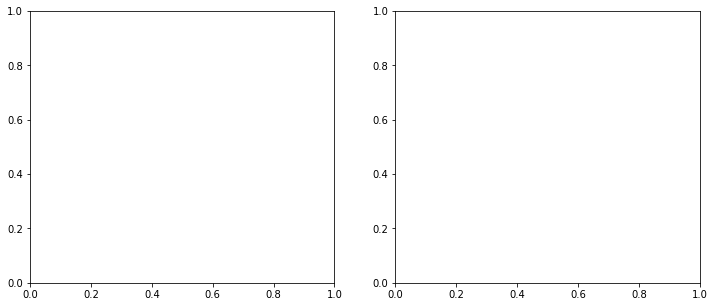

In [50]:
f, axarr = plt.subplots(1,2)
f.set_size_inches(12,5)
axarr[0].boxplot(RL_SalePrice, vert=False)
axarr[1].hist(RL_SalePrice);

In [51]:
RH_SalePrice = train.loc[train["MSZoning"]=="RH","SalePrice"];
f, axarr = plt.subplots(1,2);
f.set_size_inches(12,5);
axarr[0].boxplot(RH_SalePrice, vert=False);
axarr[1].hist(RH_SalePrice);

NameError: name 'train' is not defined

{'whiskers': [<matplotlib.lines.Line2D at 0x10ad49198>,
 'caps': [<matplotlib.lines.Line2D at 0x10ad49a58>,
 'boxes': [<matplotlib.lines.Line2D at 0x10ad49048>],
 'medians': [<matplotlib.lines.Line2D at 0x10ad502e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x10ad50710>],
 'means': []}

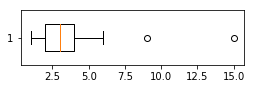

In [72]:
plt.figure(figsize=(4,1));
plt.boxplot([1,2,3,3,3,1,2,3,4,2,4,3,6,9,15], vert=False, widths=0.5)